<h1>What Is Cross-entropy?</h1>

<h4>Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.</h4>

<h1>How to Calculate Cross-Entropy</h1>

<h2>Two Discrete Probability Distributions</h2>


P=1.000 Q=1.000


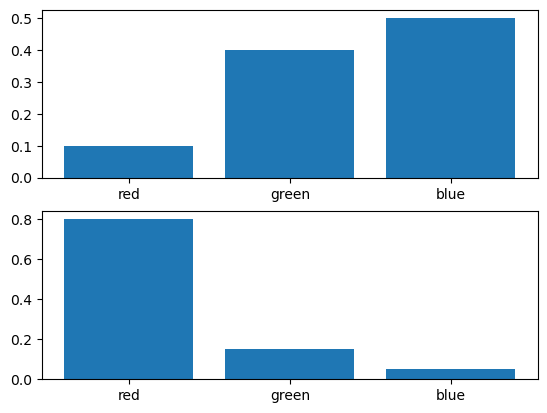

In [1]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

<h2>Calculate Cross-Entropy Between Distributions</h2>


In [2]:

# example of calculating cross entropy
from math import log2
 
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


<h2>Calculate Cross-Entropy Between Distributions</h2>


In [3]:
from math import log2
 
# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate entropy H(P)
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])
 
# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
	return entropy(p) + kl_divergence(p, q)
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate H(P)
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)
# calculate kl divergence KL(P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


<h2>Calculate Cross-Entropy Between a Distribution and Itself</h2>


In [4]:
# example of calculating cross entropy for identical distributions
from math import log2
 
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, P)
ce_pp = cross_entropy(p, p)
print('H(P, P): %.3f bits' % ce_pp)
# calculate cross entropy H(Q, Q)
ce_qq = cross_entropy(q, q)
print('H(Q, Q): %.3f bits' % ce_qq)

H(P, P): 1.361 bits
H(Q, Q): 0.884 bits


<h1>Cross-Entropy as a Loss Function</h1>

<h2>Calculate Entropy for Class Labels</h2>


In [5]:

# entropy of examples from a classification task with 3 classes
from math import log2
from numpy import asarray
 
# calculate entropy
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])
 
# class 1
p = asarray([1,0,0]) + 1e-15
print(entropy(p))
# class 2
p = asarray([0,1,0]) + 1e-15
print(entropy(p))
# class 3
p = asarray([0,0,1]) + 1e-15
print(entropy(p))

9.805612959471341e-14
9.805612959471341e-14
9.805612959471341e-14


<h2>Calculate Cross-Entropy Between Class Labels and Probabilities
</h2>

In [6]:

# calculate cross entropy for classification problem
from math import log
from numpy import mean
 
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])
 
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)
 
# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats
Average Cross Entropy: 0.247 nats


<h2>Intuition for Cross-Entropy on Predicted Probabilities</h2>

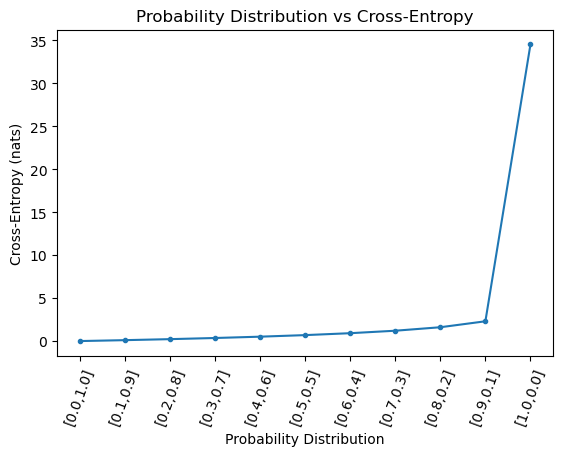

In [7]:

# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot
 
# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])
 
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

<h3> Updated code Below </h3>

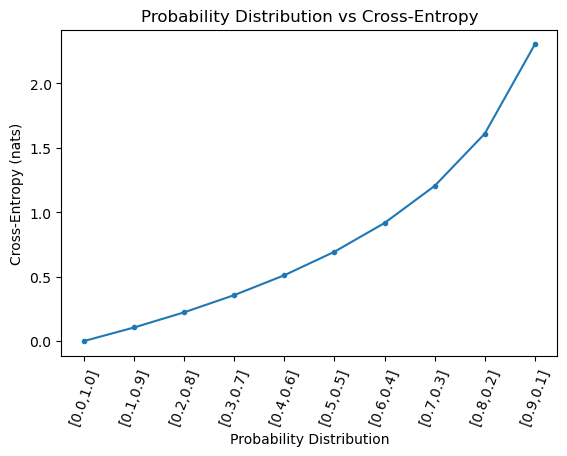

In [8]:

# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot
 
# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])
 
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

<h1>Cross-Entropy Versus Log Loss</h1>

<h2>Log Loss is the Negative Log Likelihood</h2>

<h4>In deriving the log likelihood function under a framework of maximum likelihood estimation for Bernoulli probability distribution functions (two classes), the calculation comes out to be:</h4>

<h4>negative log-likelihood(P, Q) = -(P(class0) * log(Q(class0)) + P(class1) * log(Q(class1)))</h4>

<h4>log loss = negative log-likelihood, under a Bernoulli probability distribution</h4>

<h2>Log Loss and Cross Entropy Calculate the Same Thing </h2>

In [10]:

# calculate log loss for classification problem with scikit-learn
from sklearn.metrics import log_loss
from numpy import asarray
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# define data as expected, e.g. probability for each event {0, 1}
y_true = asarray([[1-v, v] for v in p])
y_pred = asarray([[1-v, v] for v in q])
# calculate the average log loss
ll = log_loss(y_true, y_pred)
print('Average Log Loss: %.3f' % ll)

Average Log Loss: 0.247
